# 3. Merge individual images to stack

The images shown were acquired in [Rita Mateus Laboratory](https://www.ritamateus.com/).

import napari
from os import listdir
from skimage.segmentation import relabel_sequential
from skimage.measure import label
import numpy as np
import os
import pandas as pd
from os.path import isfile, join
from napari_skimage_regionprops._table import add_table
from napari_time_slicer._function import convert_to_2d_timelapse

## Merge individual images to "stack" in napari

In [2]:
#get image folder and good crystal labels
label_folder = 'imgs/6. bad-label-excluded labels/'

In [3]:
def get_sorted_image_list(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('tif')]
    return sorted(files)

In [4]:
label_list = get_sorted_image_list(label_folder)

In [ ]:
#open napari 
viewer = napari.Viewer()
viewer.open(label_list,stack=True, layer_type = "labels")
viewer.layers[0].name = "labels"

#convert folders to 2D timelaps --> behaves like a stack
label_layer = convert_to_2d_timelapse(viewer.layers["labels"],viewer)

timelapse_label_image = np.asarray(label_layer.data)

# relabel image 
relabeled_timelapse = []
relabeled_image = np.zeros((1,))
for i in range(timelapse_label_image.shape[0]):
    relabeled_image,forward_map,inverse_map = relabel_sequential(timelapse_label_image[i], offset=relabeled_image.max()+1)
    relabeled_timelapse.append(relabeled_image)

relabeled_timelapse = np.asarray(relabeled_timelapse)

#append images and labels to napari
relabeled_layer = viewer.add_labels(relabeled_timelapse)
viewer.layers.pop("labels")


Cannot move to target thread (0x271b6c14970)



## Concatenate dataframes

In [10]:
df_folder_PL = 'imgs/7. dataframes of PL/'

In [11]:
#append directory and sort
def get_sorted_list(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('csv')]
    return sorted(files)

In [12]:
df_list = get_sorted_list(df_folder_PL)
df_list

['imgs/7. dataframes of PL/img2_20220520_mutant_56hpf_2.tif.csv',
 'imgs/7. dataframes of PL/img3_l3_20220520_mutant_56hpf_3.tif.csv',
 'imgs/7. dataframes of PL/img3_l5_20220520_mutant_56hpf_3.tif.csv',
 'imgs/7. dataframes of PL/img4_l2_20220520_mutant_56hpf_4.tif.csv',
 'imgs/7. dataframes of PL/img4_l4_20220520_mutant_56hpf_4.tif.csv',
 'imgs/7. dataframes of PL/img5_l1_20220520_mutant_56hpf_5.tif.csv']

In [13]:
df_all_images = pd.DataFrame()

In [14]:
#merge individual tables 
for i, df in enumerate(df_list):
    df_one_image = pd.read_csv(df)
    df_all_images = pd.concat([df_all_images, df_one_image], ignore_index = True)

In [15]:
df_all_images

,Unnamed: 0,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter_skimage,...,roundness_simpleitk,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter_simpleitk,perimeter_on_border,perimeter_on_border_ratio
0,0,1,214,336,16.506764,236,3.666667,1.246885,0.000000,58.941125,...,0.879628,13.988563,19.478288,51.857529,8.253382,214,0,58.953907,0.0,0.0
1,1,2,232,368,17.186959,254,5.000000,1.511494,0.000000,61.112698,...,0.890703,13.144561,22.472533,53.994425,8.593480,232,0,60.619988,0.0,0.0
2,2,3,482,1040,24.772999,545,6.666667,1.904219,0.000000,107.568542,...,0.740814,13.447363,45.637309,77.826670,12.386499,482,0,105.055589,0.0,0.0
3,3,4,382,595,22.053968,436,8.000000,2.003927,0.000000,89.254834,...,0.793634,14.049873,34.617929,69.284584,11.026984,382,0,87.300406,0.0,0.0
4,0,1,292,496,19.281752,330,3.866667,1.369635,0.200000,81.597980,...,0.756802,11.442317,32.492190,60.575409,9.640876,292,0,80.041253,0.0,0.0
5,1,2,318,483,20.121883,348,5.000000,1.635639,0.133333,76.083261,...,0.844971,16.213116,24.973002,63.214760,10.060941,318,0,74.812972,0.0,0.0
6,2,3,809,1316,32.094404,876,4.733333,1.832303,0.200000,121.296465,...,0.856810,22.846475,45.085765,100.827545,16.047202,809,0,117.677776,0.0,0.0
7,3,4,1899,3036,49.171962,2031,7.000000,2.075162,0.133333,188.308658,...,0.852485,37.546382,64.397201,154.478276,24.585981,1899,0,181.209319,0.0,0.0
8,0,1,485,988,24.849973,559,6.375000,1.534278,0.000000,109.083261,...,0.733095,14.527596,42.506771,78.068494,12.424987,485,0,106.491633,0.0,0.0
9,1,2,1231,2340,39.589871,1423,5.125000,1.705930,0.000000,179.231493,...,0.719764,22.507891,69.635929,124.375248,19.794935,1231,0,172.799977,0.0,0.0


In [44]:
#relabel seqquentially
df_all_images.loc[:,"label"] = np.arange(1,df_all_images.shape[0]+1)
df_all_images.to_csv("imgs/df_PL.csv")

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Table clicked, set label 6
Table clicked, set label 1
Table clicked, set label 2


## Add df to viewer

related issue: https://github.com/haesleinhuepf/napari-skimage-regionprops/issues/41

within napari:
- go to Tools -> Measurement -> Load from CSV(nsr)
- import .csv file

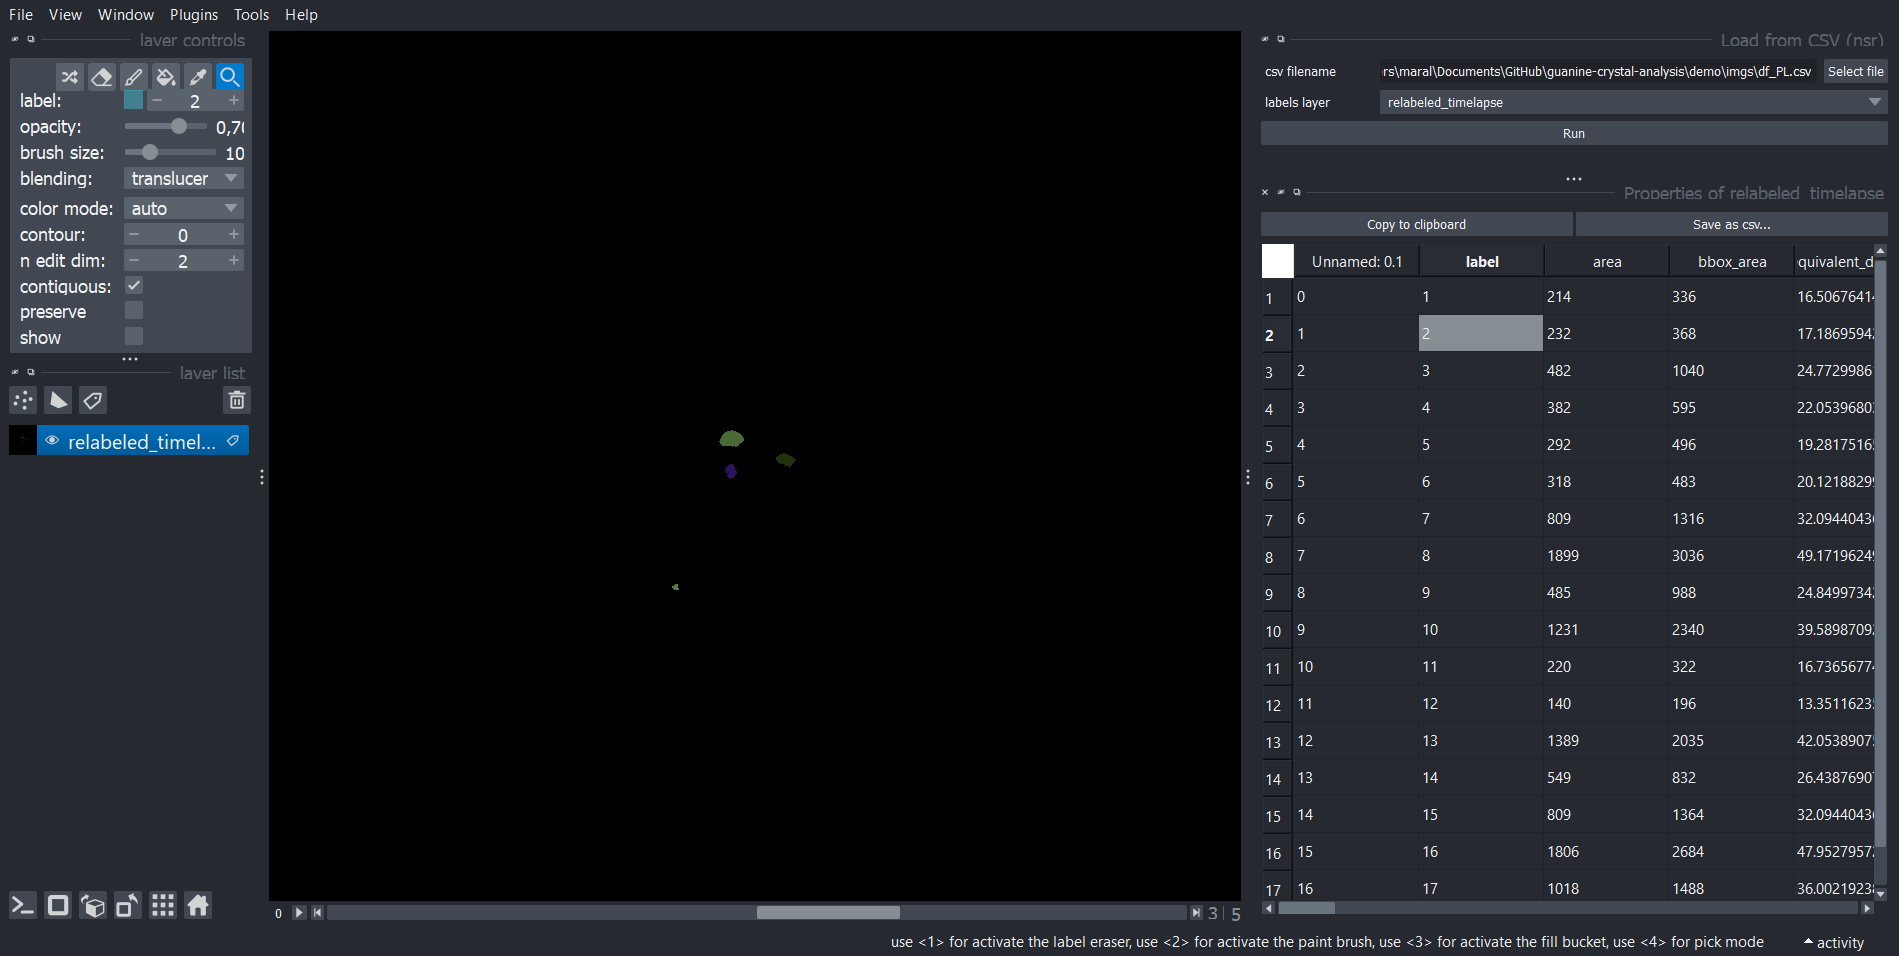

In [46]:
napari.utils.nbscreenshot(viewer)

Then you can use the napari-clusters-plotter:

Dimensionality Reduction (UMAP):
- go to Tools -> Measurement -> Dimensionality reduction (ncp)

Plotting:
- go to Tools -> Measurement -> Plot Meausrement (ncp)